# 🚀 Objective: Decision Tree Classification Implementation
# 💡 Own Code: Python Implementation for Grasping the Concept
# 🎯 Purpose: Mastering the Essentials of Decision Tree Information Gain - Entropy!"

## Entropy

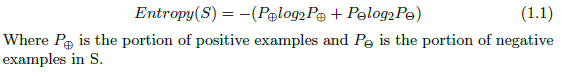

## Information Gain

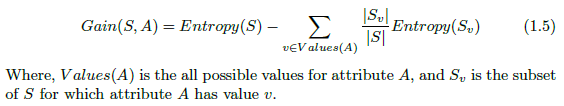

# 1. Load Python Modules

In [93]:
# Load necessary python modules
import numpy as np
import pandas as pd
from scipy.stats import entropy

# 2. Read the Dataset from CSV file  - Using Pandas

In [94]:
df = pd.read_csv("PlayTennis.csv")
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


# 3. Basic Inspection on given dataset

In [95]:
df["windy"]=df["windy"].apply(lambda x: "True" if x else "False")
df.dtypes

outlook     object
temp        object
humidity    object
windy       object
play        object
dtype: object

# 4. Decision Tree Classification with Entropy with Infromation Gain - Own Code

In [96]:
p_data = list(df["play"].value_counts())
print(p_data)
p = entropy(p_data,base=2)
print(p)

[9, 5]
0.940285958670631


In [97]:
total  = len(df)
def entropy_calculation(d, target,p):
    total = len(d)
    entropy_dict = {}
    for var in d.select_dtypes(include='object').columns:
        if var == target:
            pass
        else:
            col1 = d[var]
            col2 = d[target]
            r = pd.crosstab(col1, col2)
            entropy_val = 0
            for i in range(len(r)):
                s = r.iloc[i, [0,1]]
                total_s = s.sum()
                p0 = s[0]
                p1 = s[1]
                entropy_val=entropy_val+ (total_s/total)*entropy([p1,p0],base=2)
            entropy_dict[var] = p- entropy_val
    return entropy_dict


In [98]:
temp = df.copy()
entropy_results=entropy_calculation(temp,"play",p)
print(entropy_results)

max_entropy_feature = max(entropy_results.items(), key=lambda x: x[1])
print("Feature with the highest entropy value:")
print(f"{max_entropy_feature[0]}: {max_entropy_feature[1]}")

{'outlook': 0.246749819774439, 'temp': 0.029222565658954758, 'humidity': 0.15183550136234159, 'windy': 0.04812703040826938}
Feature with the highest entropy value:
outlook: 0.246749819774439


In [99]:
var=max_entropy_feature[0]
g=df.groupby(by=[var])
for x ,y in g:
    print(x)
    temp=y.drop(var,axis='columns')
    p_data = list(temp["play"].value_counts())
    p = entropy(p_data,base=2)
    print(p)
    if p == 0:
        print("using",x , "we can divide")
    else:
        entropy_results=entropy_calculation(temp,"play",p)
        print(entropy_results)

        max_entropy_feature = max(entropy_results.items(), key=lambda x: x[1])
        print("Feature with the highest entropy value:")
        print(f"{max_entropy_feature[0]}: {max_entropy_feature[1]}")
        

('overcast',)
0.0
using ('overcast',) we can divide
('rainy',)
0.9709505944546688
{'temp': 0.019973094021975113, 'humidity': 0.019973094021975113, 'windy': 0.9709505944546688}
Feature with the highest entropy value:
windy: 0.9709505944546688
('sunny',)
0.9709505944546688
{'temp': 0.5709505944546688, 'humidity': 0.9709505944546688, 'windy': 0.019973094021975113}
Feature with the highest entropy value:
humidity: 0.9709505944546688
